### Description: 
The dataset includes diverse features such as demographic information, credit history, employment status, income levels, existing debt, and other relevant financial metrics, providing a comprehensive foundation for sophisticated data-driven analysis and decision-making.

* Risk Score Regression: 
To predict a continuous risk score associated with each individual's likelihood of loan default or financial instability.

* Binary Classification: 
To determine the binary outcome of loan approval, indicating whether an applicant is likely to be approved or denied for a loan.

#### The dataset includes the following columns:

* ApplicationDate: Loan application date
* Age: Applicant's age
* AnnualIncome: Yearly income
* CreditScore: Creditworthiness score
* EmploymentStatus: Job situation
* EducationLevel: Highest education attained
* Experience: Work experience
* LoanAmount: Requested loan size
* LoanDuration: Loan repayment period
* MaritalStatus: Applicant's marital state
* NumberOfDependents: Number of dependents
* HomeOwnershipStatus: Homeownership type
* MonthlyDebtPayments: Monthly debt obligations
* CreditCardUtilizationRate: Credit card usage percentage
* NumberOfOpenCreditLines: Active credit lines
* NumberOfCreditInquiries: Credit checks count
* DebtToIncomeRatio: Debt to income proportion
* BankruptcyHistory: Bankruptcy records
* LoanPurpose: Reason for loan
* PreviousLoanDefaults: Prior loan defaults
* PaymentHistory: Past payment behavior
* LengthOfCreditHistory: Credit history duration
* SavingsAccountBalance: Savings account amount
* CheckingAccountBalance: Checking account funds
* TotalAssets: Total owned assets
* TotalLiabilities: Total owed debts
* MonthlyIncome: Income per month
* UtilityBillsPaymentHistory: Utility payment record
* JobTenure: Job duration
* NetWorth: Total financial worth
* BaseInterestRate: Starting interest rate
* InterestRate: Applied interest rate
* MonthlyLoanPayment: Monthly loan payment
* TotalDebtToIncomeRatio: Total debt against income
* LoanApproved: Loan approval status
* RiskScore: Risk assessment score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('Loan.csv')
data.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [3]:
data.shape

(20000, 36)

In [4]:
data.columns

Index(['ApplicationDate', 'Age', 'AnnualIncome', 'CreditScore',
       'EmploymentStatus', 'EducationLevel', 'Experience', 'LoanAmount',
       'LoanDuration', 'MaritalStatus', 'NumberOfDependents',
       'HomeOwnershipStatus', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose', 'PreviousLoanDefaults', 'PaymentHistory',
       'LengthOfCreditHistory', 'SavingsAccountBalance',
       'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities',
       'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth',
       'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore'],
      dtype='object')

##### Heatmap

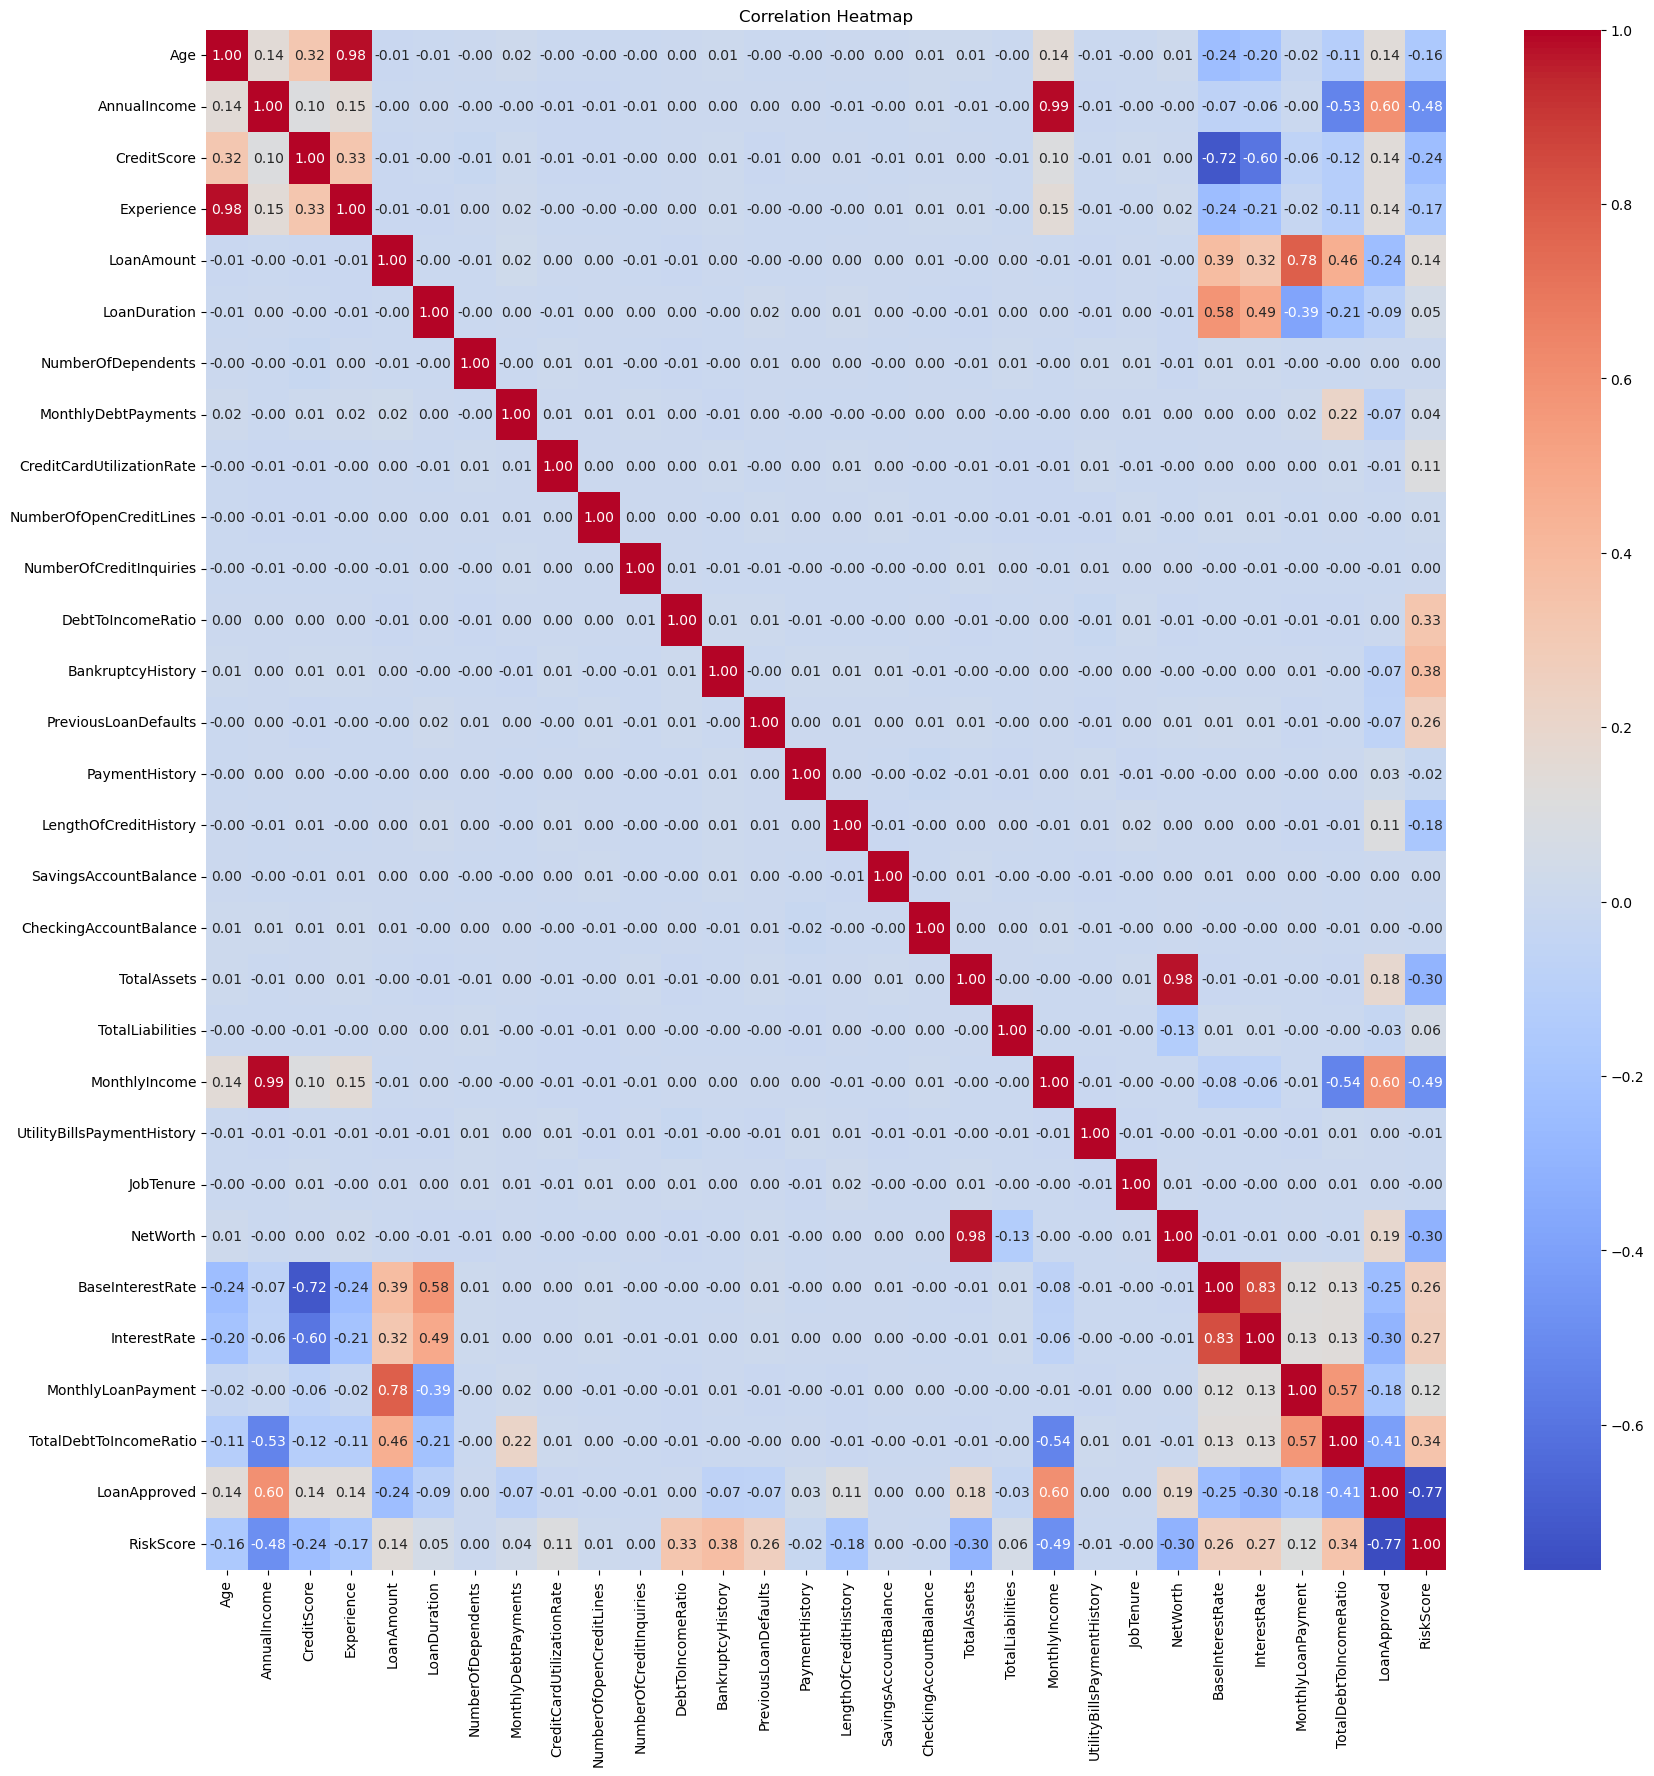

In [5]:
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

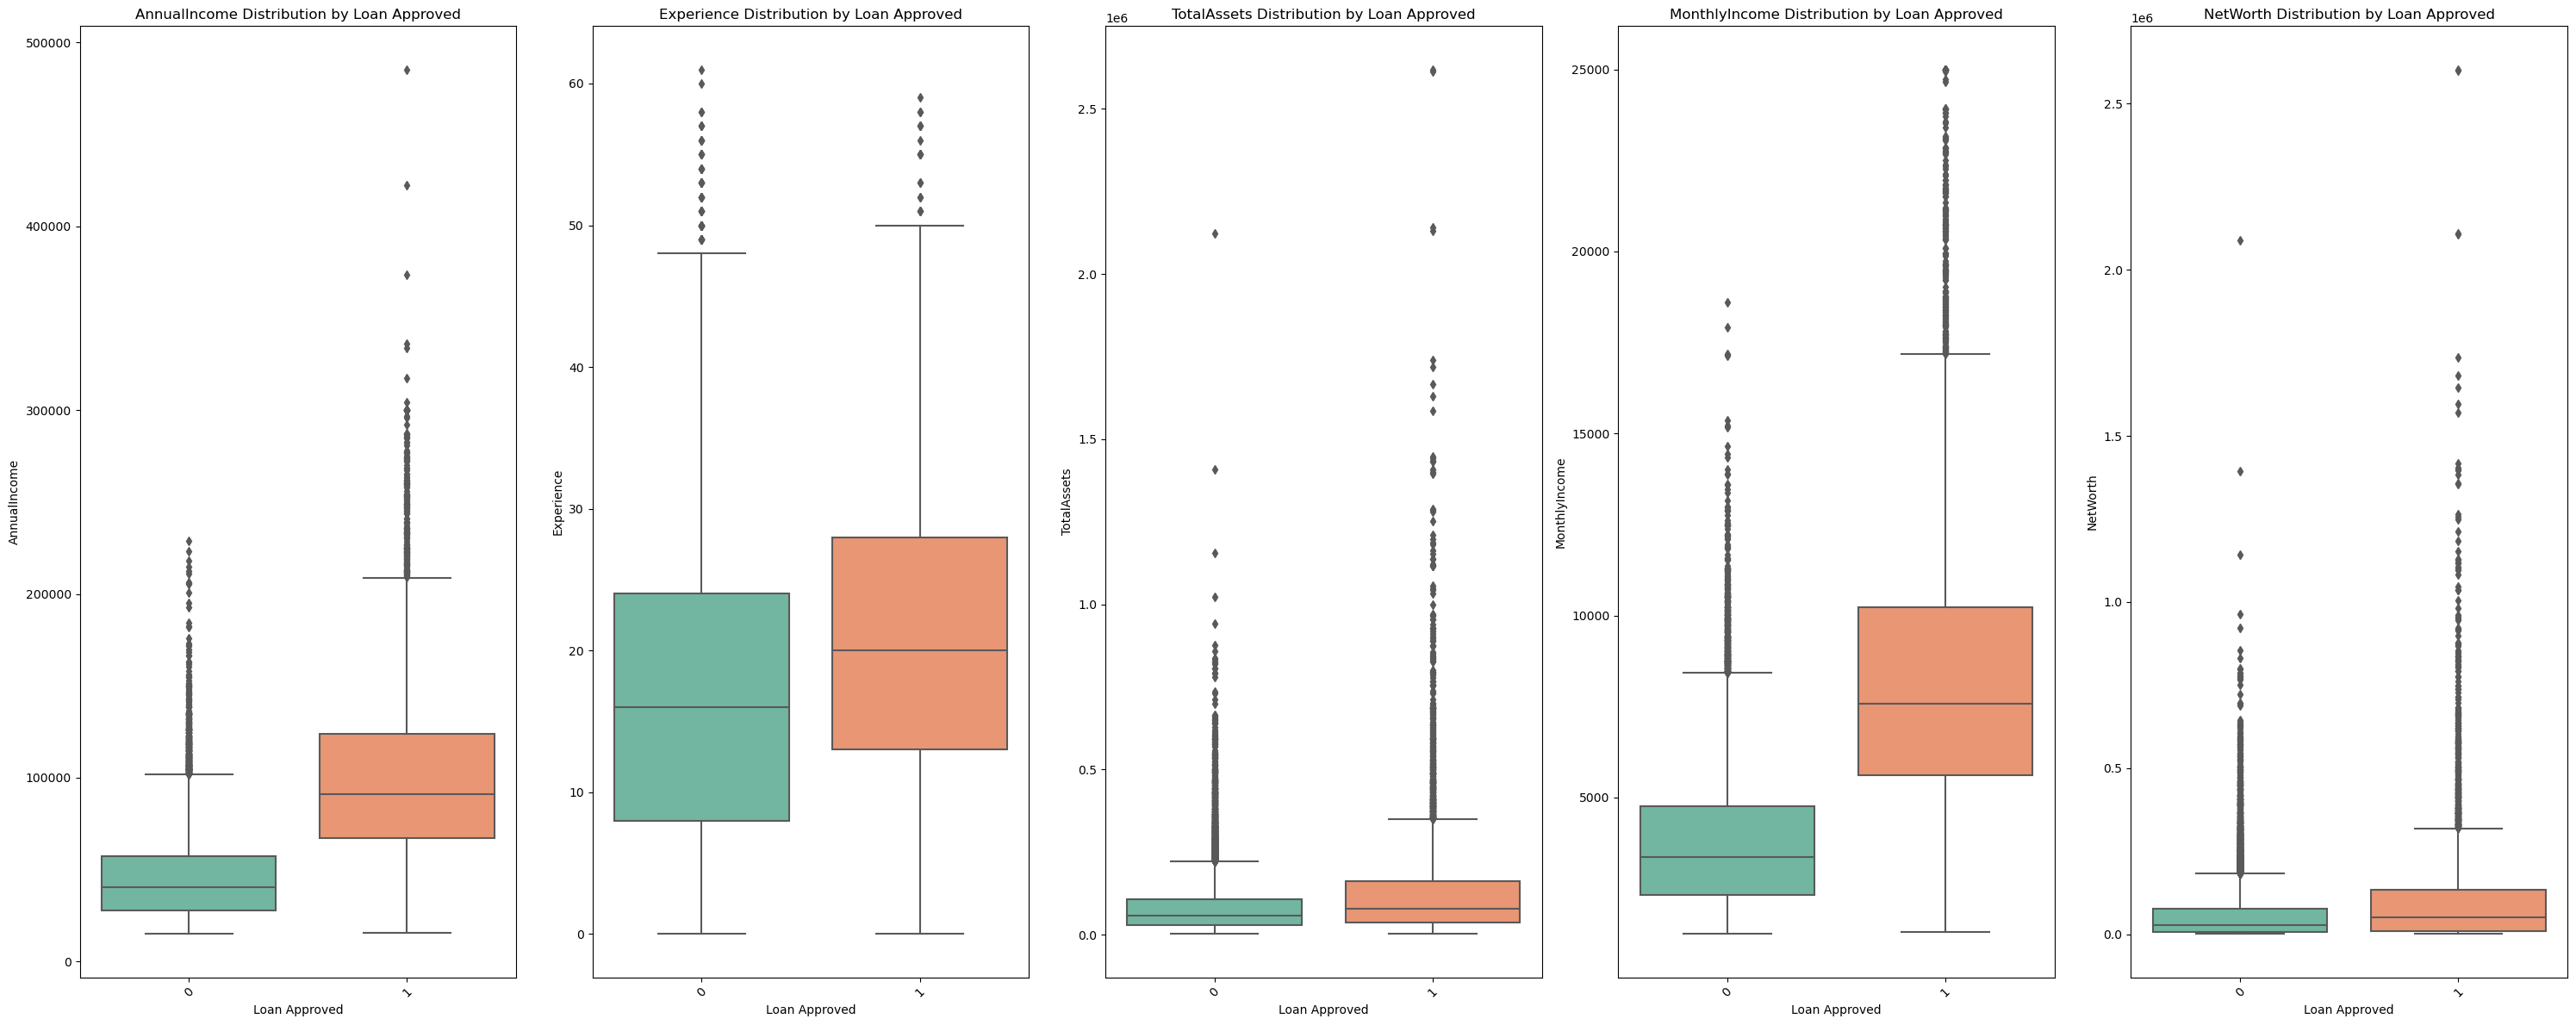

In [6]:
plot_columns1 = ['AnnualIncome', 'Experience', 'TotalAssets', 'MonthlyIncome', 'NetWorth']

    # Set up the figure
plt.figure(figsize=(30, 12))

    # Generate boxplots for each numerical column
for i, col in enumerate(plot_columns1, 1):
    plt.subplot(1, len(plot_columns1), i)
    sns.boxplot(x='LoanApproved', y=col, data=data, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Loan Approved')
    plt.xlabel('Loan Approved')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

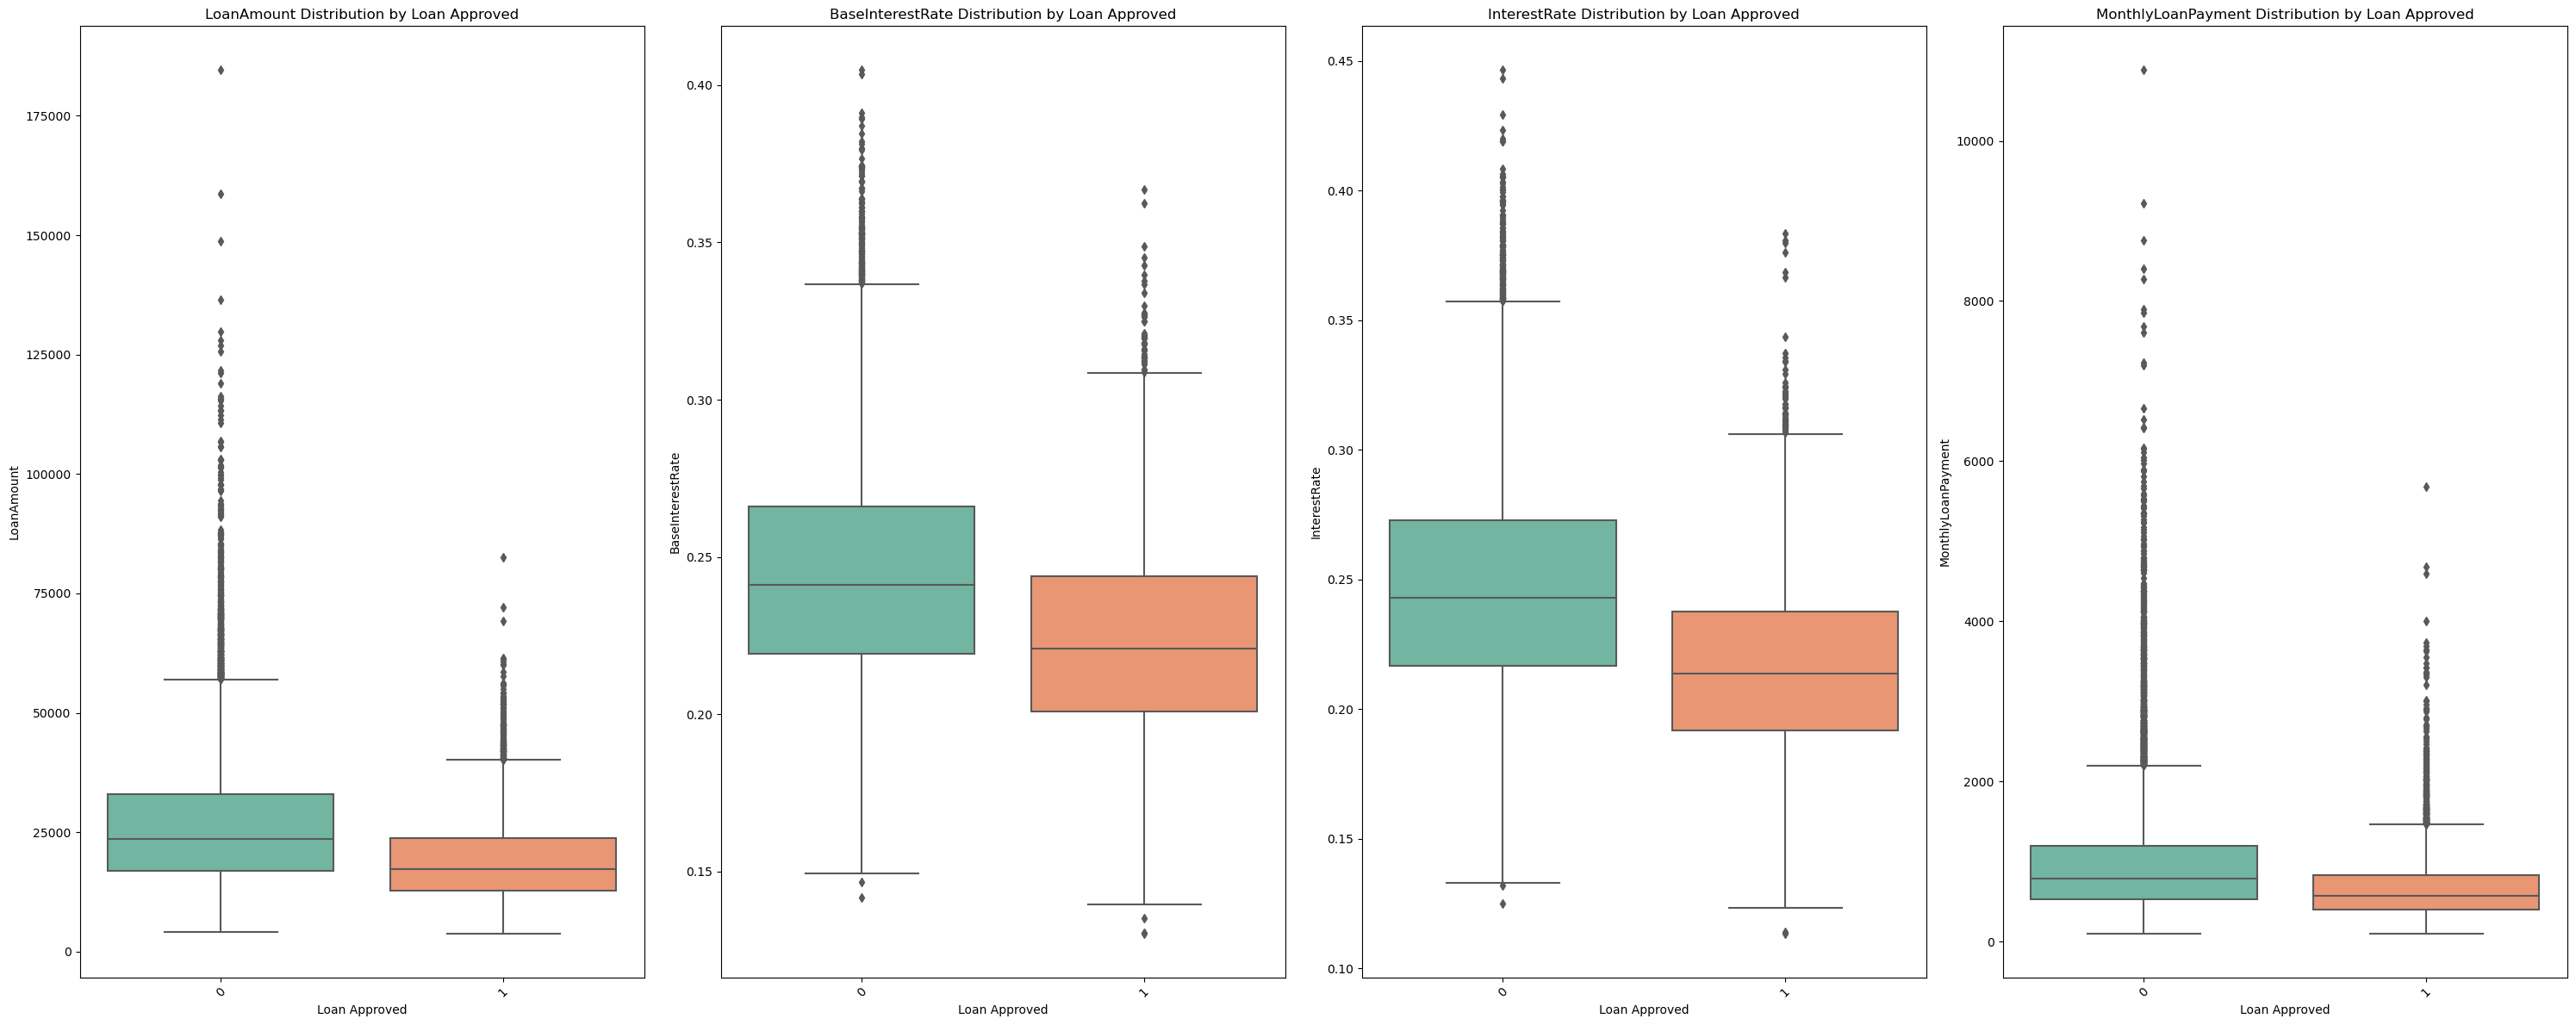

In [7]:

plot_columns2 = [ 'LoanAmount','BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment']

    # Set up the figure
plt.figure(figsize=(30, 12))

    # Generate boxplots for each numerical column
for i, col in enumerate(plot_columns2, 1):
    plt.subplot(1, len(plot_columns2), i)
    sns.boxplot(x='LoanApproved', y=col, data=data, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f'{col} Distribution by Loan Approved')
    plt.xlabel('Loan Approved')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [8]:
# Drop few columns which won't contribute to the model using domain knowldedge.
data.drop(['ApplicationDate','EmploymentStatus','EducationLevel','MaritalStatus'],axis=1,inplace=True)

In [10]:
cat_col = data.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Categorical columns: 
 Index(['HomeOwnershipStatus', 'LoanPurpose'], dtype='object')


In [ ]:
print(data['HomeOwnershipStatus'].value_counts())

In [11]:
# Let's do one hot encoding for the columns as Logistic Regression model would be expecting numeric features
data = pd.get_dummies(data, columns=['LoanPurpose', 'HomeOwnershipStatus'])

<AxesSubplot:>

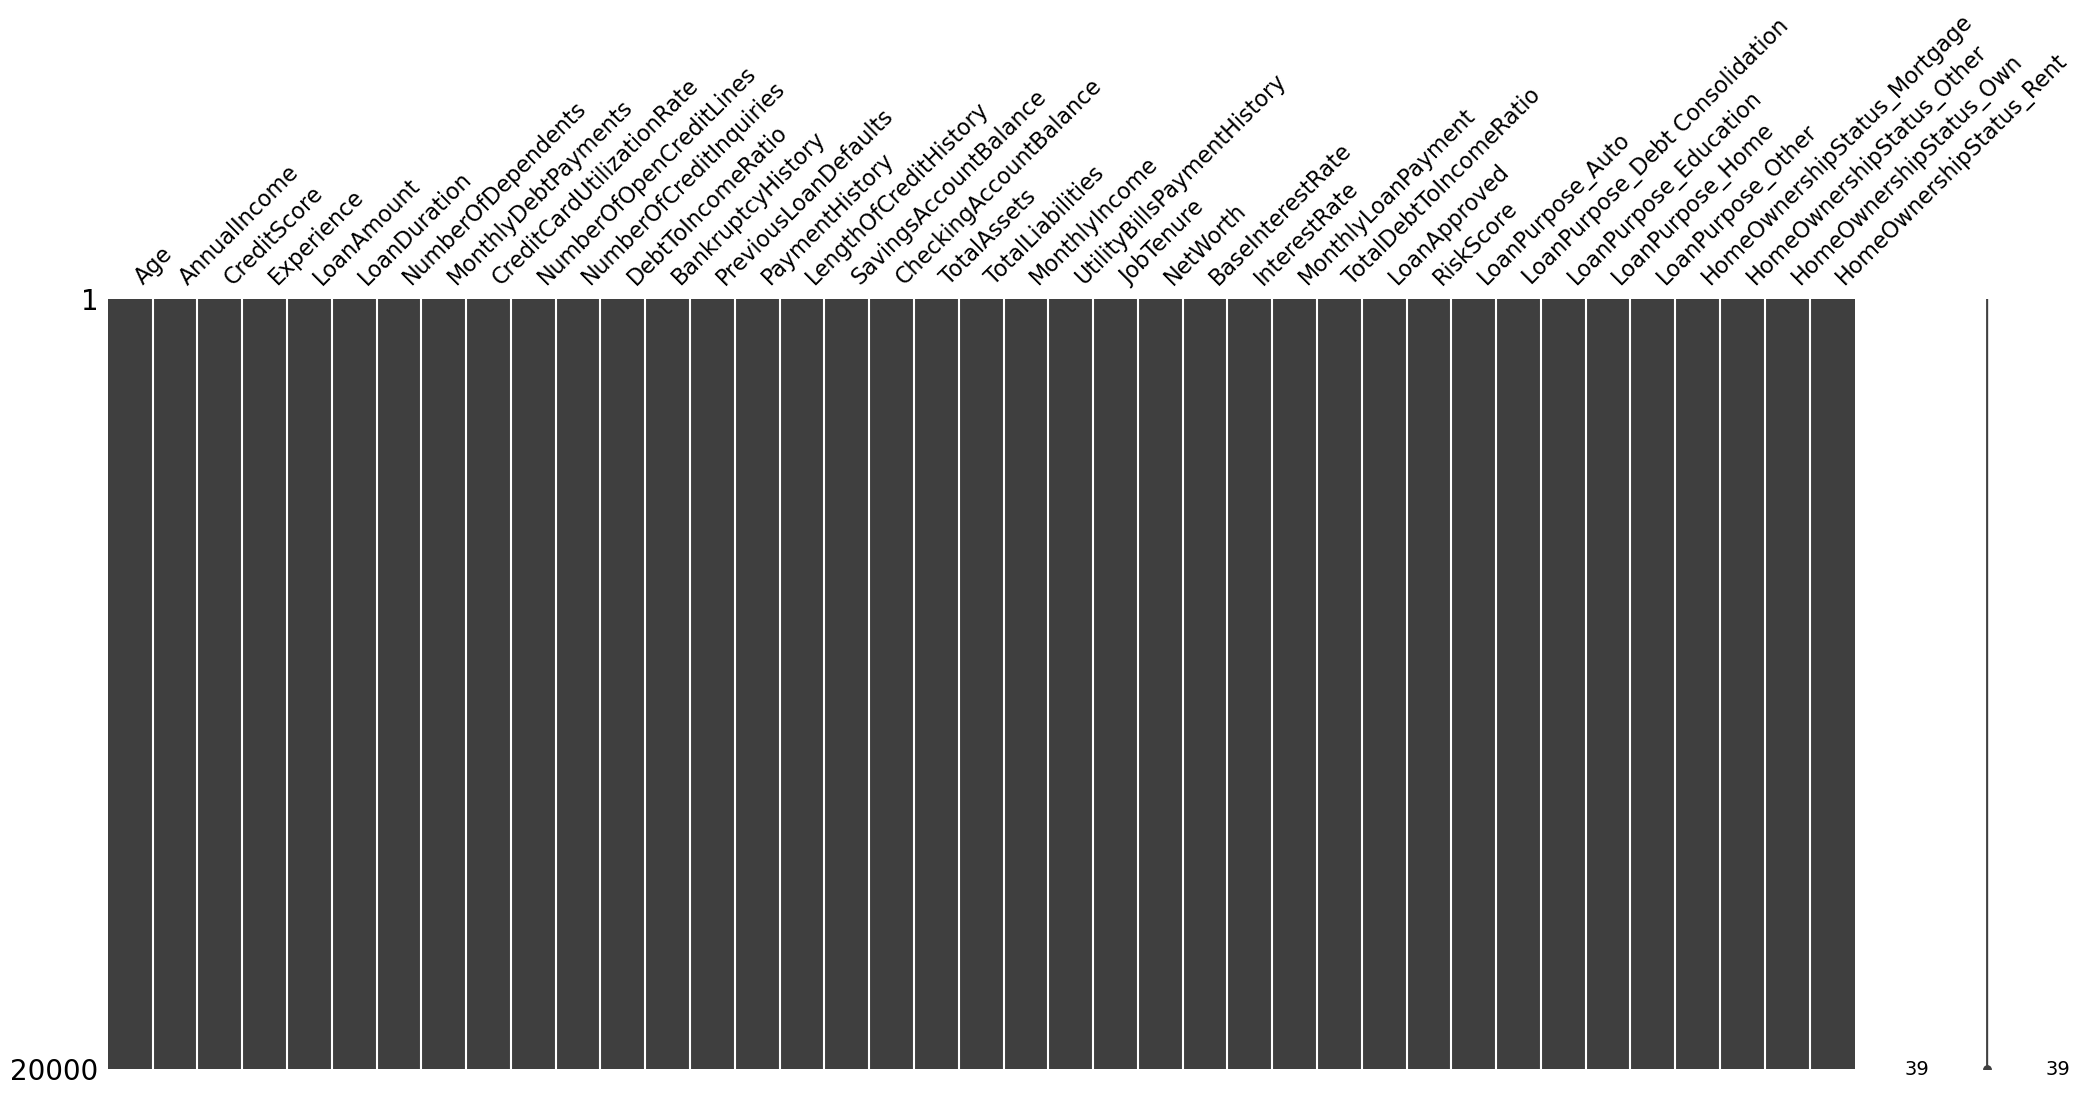

In [12]:
#checking missing values with the help of MISSINGNO Matrix
import missingno as msno
msno.matrix(data)

In [13]:
print('Overall missing values in the data are : ',data.isnull().sum().sum())

Overall missing values in the data are :  0


C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

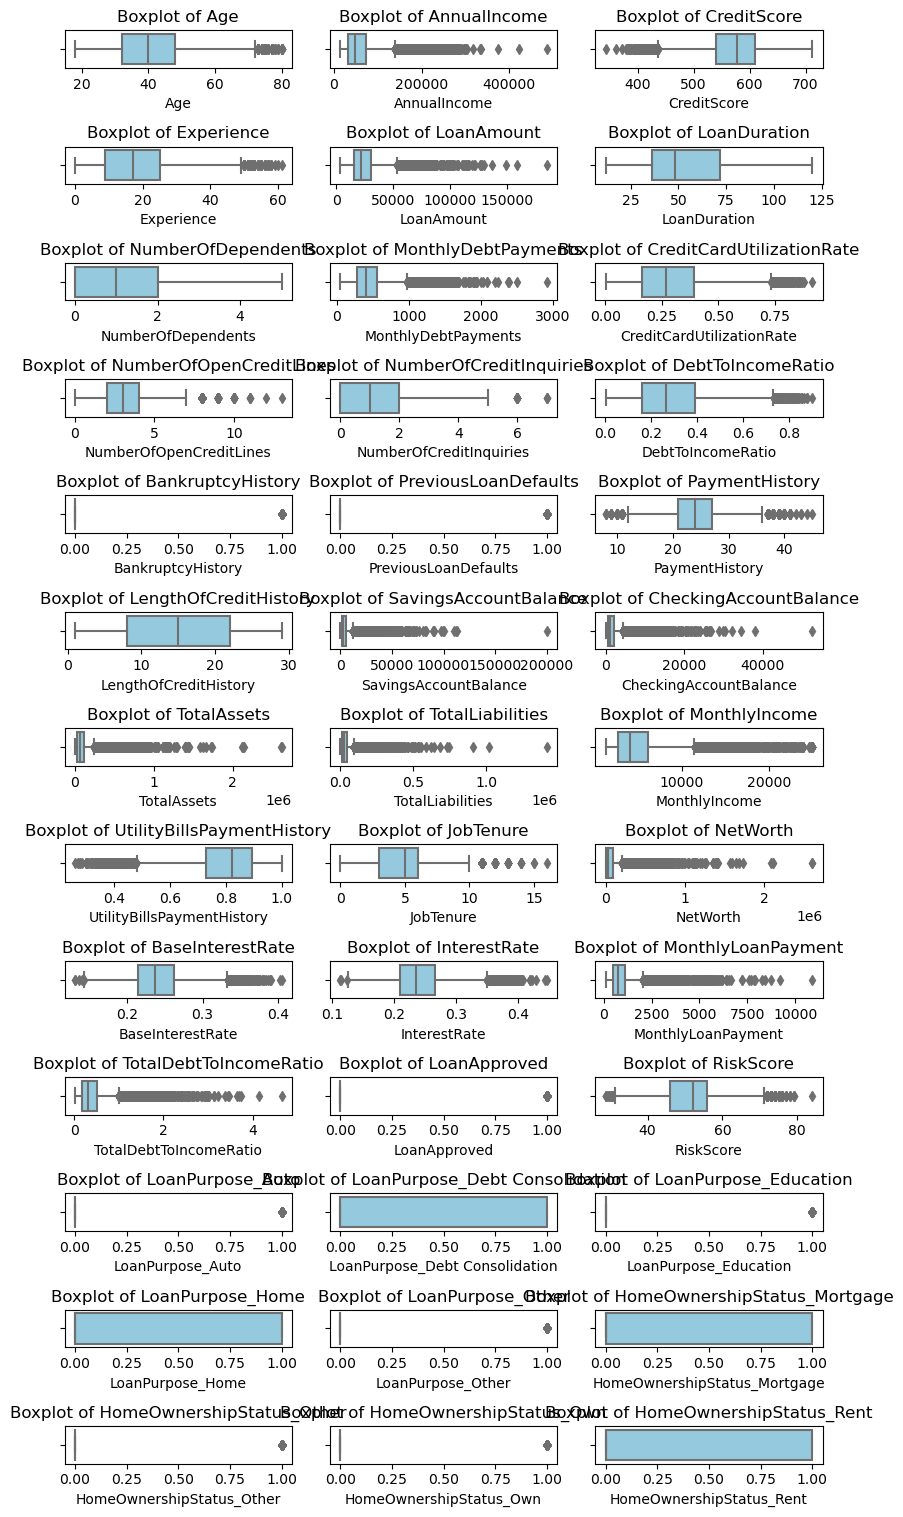

In [17]:
# Outliers

# Assuming 'data' is a DataFrame already loaded
# Select numerical columns
num_col = data.select_dtypes(include=np.number).columns

# Set up the figure
plt.figure(figsize=(8, 16))

# Generate boxplots for each numerical column
for i, col in enumerate(num_col, 1):
    plt.subplot((len(num_col) // 3) + 1, 3, i)
    sns.boxplot(data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


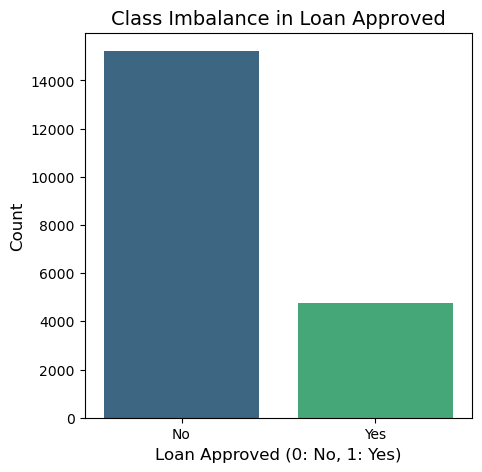

0    15220
1     4780
Name: LoanApproved, dtype: int64


In [18]:

# Plotting class imbalance for the target variable 'loan_status'
plt.figure(figsize=(5, 5))
sns.countplot(data=data, x='LoanApproved', palette='viridis')

# Adding title and labels for clarity
plt.title('Class Imbalance in Loan Approved', fontsize=14)
plt.xlabel('Loan Approved (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], fontsize=10)
plt.show()
print(data['LoanApproved'].value_counts())

### Building model

In [19]:
# Sklearn for ML; importing all the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [20]:
# Define the function to create classification model and get the evaluation metrices
def classification_model(X,y,class_weight = None):
    
    # Split the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    
    # Scale the features as we don't want one independent variable to dominate the others and additionally it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Define the model
    lr = LogisticRegression(class_weight = class_weight, random_state=0)

    # Train the model
    lr.fit(X_train, y_train)

    # Predicting target values on x_test dataset
    y_predicted = lr.predict(X_test)
    y_predicted_prob = lr.predict_proba(X_test)
    y_predicted_prob = [x[1] for x in y_predicted_prob]
    return(lr, X_test, y_test, y_predicted, y_predicted_prob)

In [21]:
# Define the function to get the evaluation metrices
def compute_evaluation_metric(model, x_test, y_actual, y_predicted, y_predicted_prob):
    
    cm = confusion_matrix(y_actual, y_predicted)
    
    print("\n Accuracy Score : ",accuracy_score(y_actual,y_predicted))
    print("\n AUC Score : ", roc_auc_score(y_actual, y_predicted_prob))
    print("\n Confusion Matrix : \n", cm)
    
    TP = sum([1 if ((i==1) & (j==1)) else 0 for (i, j) in zip(y_test, y_predicted)])
    TN = sum([1 if ((i==0) & (j==0)) else 0 for (i, j) in zip(y_test, y_predicted)])
    FP = sum([1 if ((i==0) & (j==1)) else 0 for (i, j) in zip(y_test, y_predicted)])
    FN = sum([1 if ((i==1) & (j==0)) else 0 for (i, j) in zip(y_test, y_predicted)])
    
    # Sensitivity, recall
    TPR = round(TP/(TP+FN), 4)
    
    # Specificity
    TNR = round(TN/(TN+FP), 4)
    
    # False Pos Rate
    FPR = round(FP/(FP+TN), 4)
    
    # False Neg rate
    FNR = round(FN/(TP+FN), 4)
    
    print("\n Classification Report : \n",classification_report(y_actual, y_predicted))
    print("TPR, TNR, FPR, FNR:" , TPR, TNR, FPR, FNR)
    print("\n ROC curve : \n")
    plot_roc_curve(model, x_test, y_actual)
    plt.show()

In [22]:
# Build the model on original dataset and get the evaluation metrices
X_original = data.drop(['LoanApproved'],axis=1)
y_original = data.LoanApproved
lr, X_test, y_test, y_predicted, y_predicted_prob = classification_model(X_original,y_original)


 Accuracy Score :  0.9984848484848485

 AUC Score :  0.9998293044282078

 Confusion Matrix : 
 [[5029    1]
 [   9 1561]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5030
           1       1.00      0.99      1.00      1570

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

TPR, TNR, FPR, FNR: 0.9943 0.9998 0.0002 0.0057

 ROC curve : 



C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


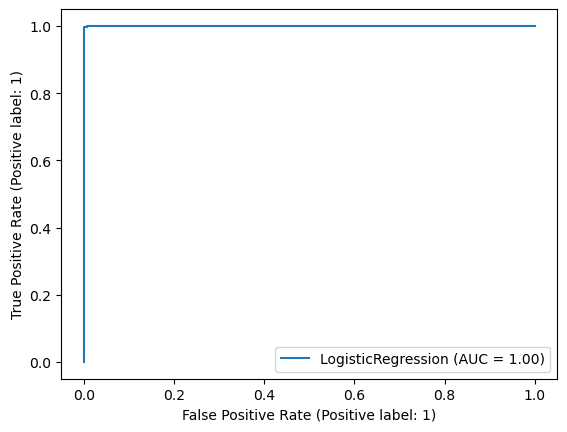

In [23]:
# Get evaluation metrices
compute_evaluation_metric(lr, X_test, y_test, y_predicted, y_predicted_prob)

In [24]:
import imblearn
#print(imblearn.__version__)

In [25]:
# import RandomOverSampler function from imblearn.over_sampling
from imblearn.over_sampling import SMOTE

# Fit the SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_original, y_original)

y_sm.value_counts()

0    15220
1    15220
Name: LoanApproved, dtype: int64

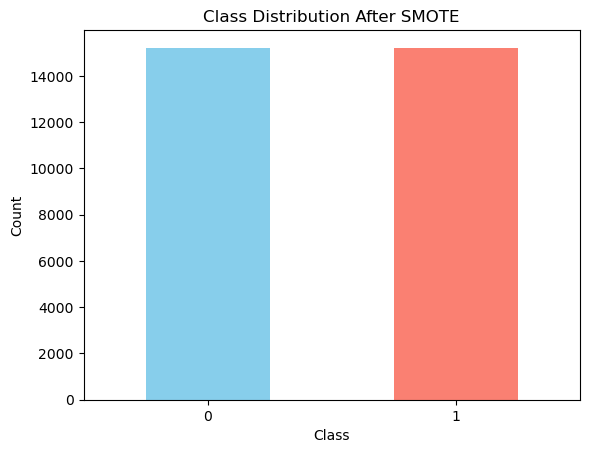

In [26]:

# Assuming y_sm is the resampled target variable after applying SMOTE
y_sm.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [27]:
y_sm.value_counts()

0    15220
1    15220
Name: LoanApproved, dtype: int64

In [28]:
# Build the model on balanced dataset and get the evaluation metrices
X = X_sm
y = y_sm
lr, X_test, y_test, y_predicted, y_predicted_prob = classification_model(X,y)


 Accuracy Score :  0.9992036631495123

 AUC Score :  0.9999588568841073

 Confusion Matrix : 
 [[4981    3]
 [   5 5057]]

 Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4984
           1       1.00      1.00      1.00      5062

    accuracy                           1.00     10046
   macro avg       1.00      1.00      1.00     10046
weighted avg       1.00      1.00      1.00     10046

TPR, TNR, FPR, FNR: 0.999 0.9994 0.0006 0.001

 ROC curve : 



C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


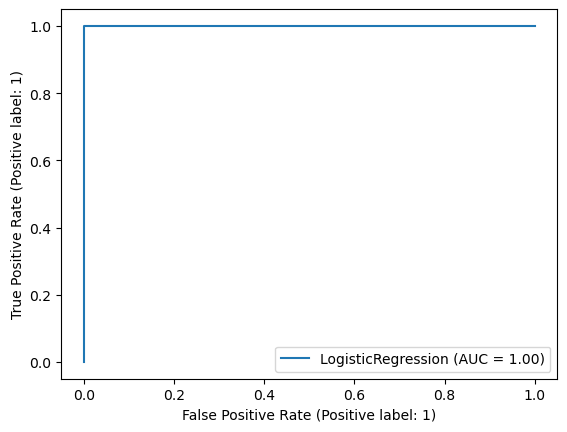

In [29]:
# Get evaluation metrices
compute_evaluation_metric(lr, X_test, y_test, y_predicted, y_predicted_prob)

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Pipeline to apply SMOTE within cross-validation
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('lr', LogisticRegression())
])

# Perform stratified k-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

print("Cross-Validation AUC Scores:", scores)
print("Mean AUC:", scores.mean())


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Cross-Validation AUC Scores: [0.9533297  0.94660518 0.95332204 0.95399375 0.94686527]
Mean AUC: 0.9508231872095815


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* Cross-Validation AUC Scores: [0.9533297  0.94660518 0.95332204 0.95399375 0.94686527]
* Mean AUC: 0.9508231872095815

### Insights

#### Model Performance:

* High AUC: 
An AUC close to 1.0 suggests excellent model performance in terms of classification.
The model is performing well on the resampled data (due to SMOTE), and the results are robust across different cross-validation splits.

* Generalization:
The consistency of the AUC scores across the folds is a positive indicator of good generalization. Your model is not highly sensitive to different subsets of the data, and it is likely to perform similarly on unseen data.

Model is performing very well on the training data after SMOTE application, with a mean AUC of 0.95 across cross-validation.
The next step is to evaluate its performance on a truly independent test set to ensure that it generalizes well beyond the training and validation process.